In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Read inputs

In [4]:
GHG =  pd.read_excel('//Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/Reference_Data.xlsx', sheet_name='GHG Footprint', decimal=',', index_col= 0)
GHG

,Parameter,Ref,1990,1991,1992,1993,1994,1995,1996,1997,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
ID,,,,,,,,,,,,,,,,,,,,,
GHG intensity of electricity generation [g CO2eq/kWh] - Germany,NaN,EEA 2022,652.0,656.0,628.0,631.0,626.0,610.0,580.0,566.0,...,62.59200,46.944000,31.296000,15.64800,0.000000,0.000000,0.000,0.000000,0.000000,0.00
GHG intensity of electricity generation [g CO2eq/kWh] - Norway,NaN,Our world in Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.18012,3.135090,2.090060,1.04503,0.000000,0.000000,0.000,0.000000,0.000000,0.00
Grey hydrogen emissions [g CO2/MJ H2] - Norway,96.77,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grey hydrogen emissions [kg CO2/kg H2] - Norway,11.6124,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blue hydrogen emissions [g CO2/MJ H2] - Norway,NaN,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.34300,32.479333,30.615667,28.75200,26.888333,25.024667,23.161,21.297333,19.433667,17.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Assumed load factor for compressor electricity consumption [h/a],5000,EHB 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assumed load factor for compressor electricity consumption [%],0.570776,EHB 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capacity at full load factor [GW_H2_LHV],13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Definition of variables


In [8]:
# LHV H2 in moles per MJ
LHV_H2_moles_MJ = float(GHG.loc['H2 LHV [mole/MJ]']['Parameter'])
LHV_H2_moles_MJ

4.128787878787879

In [11]:
# CO2 produced during SMR @ 1 mole CO2 per 4 moles H2 [moles CO2/MJ]
CO2_SMR_mole = LHV_H2_moles_MJ * 1/4
CO2_SMR_mole

1.0321969696969697

In [14]:
# Molecular weight of CO2 [g/Mole]
CO2_g_mole = float(GHG.loc['CO2 [g/Mole]']['Parameter'])
CO2_g_mole

44.01

In [15]:
# Capture rate syngas [%] low
capture_rate_low = float(GHG.loc['Capture rate [%] low']['Parameter'])
capture_rate_low

0.55

In [16]:
# Capture rate syngas [%] mid
capture_rate_mid = float(GHG.loc['Capture rate [%] mid']['Parameter'])
capture_rate_mid

0.8

In [42]:
# Capture rate syngas [%] high
capture_rate_high = float(GHG.loc['Capture rate [%] high']['Parameter'])
capture_rate_high

0.95

In [43]:
# Molecular weight of CH4 [g/Mole]
CH4_g_mole = float(GHG.loc['CH4 [g/Mole]']['Parameter'])
CH4_g_mole

16.04

In [44]:
# Heat consumption to drive SMR in [MJ/mole_H2]
Drive_Energy_MJ_mole_h2 = float(GHG.loc['Heat Input [MJ/mole_H2]']['Parameter'])
Drive_Energy_MJ_mole_h2

0.1814

In [45]:
# Emission intensity of CH4 [g CO2/MJ]
emission_intensity_CH4 = float(GHG.loc['Combustion emissions CH4 [g CO2/MJ]']['Parameter'])
emission_intensity_CH4

56.0

In [46]:
# Flue gas capture rate [%] low
capture_rate_flue_gas_low = float(GHG.loc['Capture rate [%] flue gas low']['Parameter'])
capture_rate_flue_gas_low

0.65

In [47]:
# Flue gas capture rate [%] high
capture_rate_flue_gas_high = float(GHG.loc['Capture rate [%] flue gas high']['Parameter'])
capture_rate_flue_gas_high

0.9

In [48]:
#GWP20 of methane
GWP20_CH4 = float(GHG.loc['CH4 GWP20 [Years]']['Parameter'])
GWP20_CH4

86.0

In [49]:
#GWP100 of methane
GWP100_CH4 = float(GHG.loc['CH4 GWP100 [Years]']['Parameter'])
GWP100_CH4

30.0

In [50]:
# Methane leakage rate in %
leakage_rate_low = float(GHG.loc['Upstream methane leakage rate [%] low']['Parameter'])
leakage_rate_low

0.002

In [51]:
# Methane leakage rate in %
leakage_rate_mid = float(GHG.loc['Upstream methane leakage rate [%] mid']['Parameter'])
leakage_rate_mid

0.015

In [52]:
# Methane leakage rate in %
leakage_rate_high = float(GHG.loc['Upstream methane leakage rate [%] high']['Parameter'])
leakage_rate_high

0.08

# Direct emissions from SMR

In [53]:
# CO2 emissions from SMR process [g CO2/MJ]
Direct_emissions_grey = CO2_g_mole * CO2_SMR_mole
Direct_emissions_grey

45.42698863636364

In [54]:
# CO2 emissions from SMR @ 55% capture rate [g CO2/MJ]
Direct_emissions_low = Direct_emissions_grey * (1-capture_rate_low)
Direct_emissions_low

20.442144886363636

In [55]:
# CO2 emissions from SMR @ 55% capture rate [g CO2/MJ]
Direct_emissions_mid = Direct_emissions_grey * (1-capture_rate_mid)
Direct_emissions_mid

9.085397727272726

In [56]:
# CO2 emissions from SMR @ 55% capture rate [g CO2/MJ]
Direct_emissions_high = Direct_emissions_grey * (1-capture_rate_high)
Direct_emissions_high

2.271349431818184

In [57]:
#CH4 consumed during SMR @ 1 mole CH4 per 4 moles H2 [g CH4/MJ]
CH4_SMR_grams = 1.03 * CH4_g_mole
CH4_SMR_grams


16.5212

Emissions from energy to drive SMR

## w/o flue gas capture (Grey)

In [58]:
# When burning natural gas for heat production CO2 is emitted [CO2/mole_H2]
Drive_CO2_emissions_mole = Drive_Energy_MJ_mole_h2 * emission_intensity_CH4
Drive_CO2_emissions_mole

10.1584

In [59]:
# CO2 emissions per MJ hydrogen in order to create heat and pressure - w/o flue gas capture [g CO2/MJ_H2]
Drive_CO2_emissions_grams_grey = Drive_CO2_emissions_mole * LHV_H2_moles_MJ
Drive_CO2_emissions_grams_grey

41.94187878787879

## w/o flue gas capture (blue)

In [60]:
# CO2 emissions drive with flue gas capture - low [g CO2/MJ]
Drive_CO2_emissions_grams_blue_flue_low = Drive_CO2_emissions_grams_grey * (1 - capture_rate_flue_gas_low)
Drive_CO2_emissions_grams_blue_flue_low

14.679657575757576

In [61]:
# CO2 emissions drive with flue gas capture - high [g CO2/MJ]
Drive_CO2_emissions_grams_blue_flue_high = Drive_CO2_emissions_grams_grey * (1 - capture_rate_flue_gas_high)
Drive_CO2_emissions_grams_blue_flue_high

4.194187878787878

# Check this cell!!

In [62]:
# CH4 consumed to drive the process [g CH4/MJ_H2]
Drive_CH4_consumed = Drive_Energy_MJ_mole_h2 * 1/CO2_g_mole * CH4_g_mole
Drive_CH4_consumed

0.06611351965462395

# Total direct CO2 emissions

## Without flue gas capture

In [63]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_grey = Direct_emissions_grey + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_grey

87.36886742424244

In [64]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_low_no_fluegas = Direct_emissions_low + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_blue_low_no_fluegas

62.38402367424243

In [65]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_mid_no_fluegas = Direct_emissions_mid + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_blue_mid_no_fluegas

51.02727651515152

In [66]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_high_no_fluegas = Direct_emissions_high + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_blue_high_no_fluegas

44.21322821969698

## With flue gas capture

### low (65%)

In [67]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_low_with_fluegas_low = Direct_emissions_low + Drive_CO2_emissions_grams_blue_flue_low
Total_CO2_emissions_blue_low_with_fluegas_low

35.12180246212121

In [68]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_mid_with_fluegas_low = Direct_emissions_mid + Drive_CO2_emissions_grams_blue_flue_low
Total_CO2_emissions_blue_mid_with_fluegas_low

23.7650553030303

In [69]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_high_with_fluegas_low = Direct_emissions_high + Drive_CO2_emissions_grams_blue_flue_low
Total_CO2_emissions_blue_high_with_fluegas_low

16.95100700757576

### high (90%)

In [70]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_low_with_fluegas_high = Direct_emissions_low + Drive_CO2_emissions_grams_blue_flue_high
Total_CO2_emissions_blue_low_with_fluegas_high

24.636332765151515

In [71]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_mid_with_fluegas_high = Direct_emissions_mid + Drive_CO2_emissions_grams_blue_flue_high
Total_CO2_emissions_blue_mid_with_fluegas_high

13.279585606060603

In [72]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_high_with_fluegas_high = Direct_emissions_high + Drive_CO2_emissions_grams_blue_flue_high
Total_CO2_emissions_blue_high_with_fluegas_high

6.465537310606063

## Indirect emissions from natural gas transport and storage

In [73]:
# Indirect emissions from natural gas transport and storage [g CO2/MJ_H2]
Indirect_emissions = Total_CO2_emissions_grey * 0.075
Indirect_emissions

6.552665056818182

# CH4 upstream emissions

In [74]:
# CH4 consumption as feedstock and energy to drive SMR [g CH4/MJ_H2]
Total_methane_SMR = CH4_SMR_grams + Drive_CH4_consumed
Total_methane_SMR

16.587313519654625

In [75]:
# Quantity of methane consumed to produce grey hydrogen [g CH4/MJ_H2]
upstream_emissions_CH4_low = leakage_rate_low * Total_methane_SMR
upstream_emissions_CH4_low

0.03317462703930925

In [76]:
# Quantity of methane consumed to produce grey hydrogen [g CH4/MJ_H2]
upstream_emissions_CH4_mid = leakage_rate_mid * Total_methane_SMR
upstream_emissions_CH4_mid

0.24880970279481937

In [77]:
# Quantity of methane consumed to produce grey hydrogen [g CH4/MJ_H2]
upstream_emissions_CH4_high = leakage_rate_high * Total_methane_SMR
upstream_emissions_CH4_high

1.32698508157237

In [78]:
# Upstream emissions at GWP20 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP20_low = upstream_emissions_CH4_low * GWP20_CH4
upstream_emissions_GWP20_low


2.853017925380595

In [79]:
# Upstream emissions at GWP20 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP20_mid = upstream_emissions_CH4_mid * GWP20_CH4
upstream_emissions_GWP20_mid

21.397634440354466

In [80]:
# Upstream emissions at GWP20 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP20_high = upstream_emissions_CH4_high * GWP20_CH4
upstream_emissions_GWP20_high

114.12071701522382

In [81]:
# Upstream emissions at GWP100 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP100_low = upstream_emissions_CH4_low * GWP100_CH4
upstream_emissions_GWP100_low

0.9952388111792775

In [82]:
# Upstream emissions at GWP100 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP100_mid = upstream_emissions_CH4_mid * GWP100_CH4
upstream_emissions_GWP100_mid

7.464291083844581

In [83]:
# Upstream emissions at GWP100 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP100_high = upstream_emissions_CH4_high * GWP100_CH4
upstream_emissions_GWP100_high

39.8095524471711

# Total emissions

In [84]:
# Total CO2 emissions including indirect emissions from natural gas transport and storage
Total_CO2_emissions = Total_CO2_emissions_grey + Indirect_emissions
Total_CO2_emissions

93.92153248106062

## w/o flue gas capture

### @ GWP20

In [85]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_low = Total_CO2_emissions_grey + Indirect_emissions + upstream_emissions_GWP20_low
Total_emissions_grey_GWP20_low

96.77455040644122

In [86]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_mid = Total_CO2_emissions_grey + Indirect_emissions + upstream_emissions_GWP20_mid
Total_emissions_grey_GWP20_mid


115.31916692141509

In [87]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_high = Total_CO2_emissions_grey + Indirect_emissions + upstream_emissions_GWP20_high
Total_emissions_grey_GWP20_high

208.04224949628446

### @ GWP100

In [88]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP100_low = Total_CO2_emissions + upstream_emissions_GWP100_low
Total_emissions_grey_GWP100_low

94.9167712922399

In [89]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP100_mid = Total_CO2_emissions + upstream_emissions_GWP100_mid
Total_emissions_grey_GWP100_mid

101.38582356490521

In [90]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP100_high = Total_CO2_emissions + upstream_emissions_GWP100_high
Total_emissions_grey_GWP100_high

133.73108492823172

## w/ flue gas capture

### @GWP20

In [91]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_low = Total_CO2_emissions + upstream_emissions_GWP20_low
Total_emissions_grey_GWP20_low

96.77455040644122

In [92]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_mid = Total_CO2_emissions + upstream_emissions_GWP20_mid
Total_emissions_grey_GWP20_mid

115.31916692141509

In [93]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_high = Total_CO2_emissions + upstream_emissions_GWP20_high
Total_emissions_grey_GWP20_high

208.04224949628446

# Energy to power carbon capture

In [94]:
xx none according to Bauer et al.


SyntaxError: invalid syntax (591946292.py, line 1)

flue gas capture (FGC)

In [95]:
x =['Grey, 0.2%, GWP100\nw/o FGC', 'Grey, 0.2%, GWP20\nw/o FGC', 'Blue, 0.2%, GWP100\nCCS-low 55%, w/o FGC', 'Blue, 0.2%, GWP20\nCCS-low 55%, w/o FGC','Blue, 0.2%, GWP100\nCCS-mid 80%, FGC 65%', 'Blue, 0.2%, GWP20\nCCS-mid 80%, FGC 65%','Blue, 0.2%, GWP100\nCCS-high 95%, FGC 90%','Blue, 0.2%, GWP20\nCCS-high 95%, FGC 90%']

In [96]:
Direct_emissions = [Direct_emissions_grey, Direct_emissions_grey, Direct_emissions_low, Direct_emissions_low, Direct_emissions_mid, Direct_emissions_mid, Direct_emissions_high, Direct_emissions_high]

Drive_emissions_plt = [Drive_CO2_emissions_grams_grey, Drive_CO2_emissions_grams_grey, Drive_CO2_emissions_grams_grey, Drive_CO2_emissions_grams_grey, Drive_CO2_emissions_grams_blue_flue_low, Drive_CO2_emissions_grams_blue_flue_low, Drive_CO2_emissions_grams_blue_flue_high, Drive_CO2_emissions_grams_blue_flue_high]

Indirect_emissions_plt = [Indirect_emissions] * 8

Upstream_emissions = [upstream_emissions_GWP100_low, upstream_emissions_GWP20_low, upstream_emissions_GWP100_low, upstream_emissions_GWP20_low, upstream_emissions_GWP100_low, upstream_emissions_GWP20_low, upstream_emissions_GWP100_low, upstream_emissions_GWP20_low]

# Calc. total emissions for each case

In [97]:
Grey_GWP100 = Direct_emissions_grey + Drive_CO2_emissions_grams_grey + Indirect_emissions + upstream_emissions_GWP100_low
Grey_GWP100

94.9167712922399

In [98]:
Grey_GWP20 = Direct_emissions_grey + Drive_CO2_emissions_grams_grey + Indirect_emissions + upstream_emissions_GWP20_low
Grey_GWP20

96.77455040644122

In [99]:
pess = Direct_emissions_low + Drive_CO2_emissions_grams_grey + Indirect_emissions + upstream_emissions_GWP20_low
pess

71.78970665644121

In [100]:
opt = Direct_emissions_high + Drive_CO2_emissions_grams_blue_flue_high + Indirect_emissions + upstream_emissions_GWP20_low
opt

15.87122029280484

# Plot production emissions

In [101]:
x =['Grey, 0.2%, GWP100\nw/o FGC', 'Grey, 0.2%, GWP20\nw/o FGC', 'Blue, 0.2%, GWP100\nCCS-low 55%, w/o FGC', 'Blue, 0.2%, GWP20\nCCS-low 55%, w/o FGC','Blue, 0.2%, GWP100\nCCS-mid 80%, FGC 65%', 'Blue, 0.2%, GWP20\nCCS-mid 80%, FGC 65%','Blue, 0.2%, GWP100\nCCS-high 95%, FGC 90%','Blue, 0.2%, GWP20\nCCS-high 95%, FGC 90%']

Text(0, 0.5, 'g CO2eq/MJ H2')

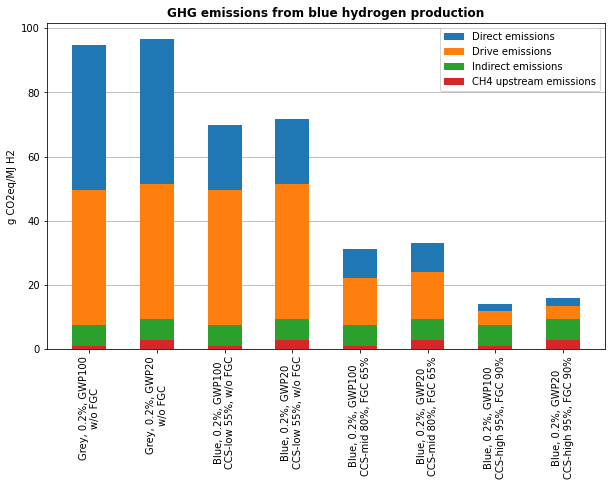

In [102]:
# Creating a stacked bar chart to display emissions. Adding lists for the bottom method.
fig, ax = plt.subplots(figsize=(10,6))

width = 0.5
#y_axis = np.arange(101,step=10)
direct = plt.bar(x, Direct_emissions, width, label='Direct emissions', bottom=list(map(lambda x, y, z: x + y + z, Upstream_emissions, Indirect_emissions_plt, Drive_emissions_plt)))
drive = plt.bar(x, Drive_emissions_plt, width, label='Drive emissions', bottom=list(map(lambda x, y: x + y, Upstream_emissions, Indirect_emissions_plt)))
indirect = plt.bar(x, Indirect_emissions, width, label = 'Indirect emissions', bottom=Upstream_emissions)
upstream = plt.bar(x, Upstream_emissions, width, label = 'CH4 upstream emissions')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
#ax.twinx()
plt.xticks(rotation = 90)
#plt.yticks(y_axis)
#plt.ylim(0,90)
plt.legend(loc='upper right')
plt.title('GHG emissions from blue hydrogen production', fontweight = 'bold')
plt.ylabel('g CO2eq/MJ H2')
#ax.set_ylabel('kg CO2/kg H2')

In [ ]:
grey_low_GWP100 = 'Grey hydrogen 0.2% @GWP100'
plt.bar(grey_low_GWP100, Direct_emissions_grey, width= 2, label='Direct emissions grey', bottom=Drive_CO2_emissions_grams_grey)
plt.bar(grey_low_GWP100, Drive_CO2_emissions_grams_grey, width= 2, label='Drive emissions', bottom=Indirect_emissions)
plt.bar(grey_low_GWP100, Indirect_emissions, width= 2, label = 'Emissions from natural gas transport and storage', bottom=upstream_emissions_GWP100_low)
plt.bar(grey_low_GWP100, upstream_emissions_GWP100_low, width = 2, label = 'CH4 upstream emissions')
plt.legend(loc='upper left')
plt.ylabel('[g CO2eq/MJ_H2]')

Text(0, 0.5, '[g CO2eq/MJ_H2]')

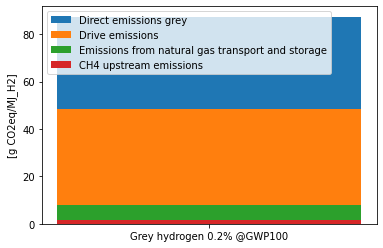

In [81]:
# Total emissions for grey hydrogen production at 0.02% upstream emissions and GWP100
grey_low_GWP100 = 'Grey hydrogen 0.2% @GWP100'
plt.bar(grey_low_GWP100, Direct_emissions_grey, width= 2, label='Direct emissions grey', bottom=Drive_CO2_emissions_grams_grey)
plt.bar(grey_low_GWP100, Drive_CO2_emissions_grams_grey, width= 2, label='Drive emissions', bottom=Indirect_emissions)
plt.bar(grey_low_GWP100, Indirect_emissions, width= 2, label = 'Emissions from natural gas transport and storage', bottom=upstream_emissions_GWP100_low)
plt.bar(grey_low_GWP100, upstream_emissions_GWP100_low, width = 2, label = 'CH4 upstream emissions')
plt.legend(loc='upper left')
plt.ylabel('[g CO2eq/MJ_H2]')

Text(0, 0.5, '[g CO2eq/MJ_H2]')

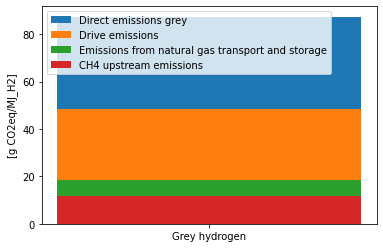

In [82]:
# Total emissions for grey hydrogen production at 1.5% upstream emissions and GWP100
grey = 'Grey hydrogen'
plt.bar(grey, Direct_emissions_grey, width= 2, label='Direct emissions grey', bottom=Drive_CO2_emissions_grams_grey)
plt.bar(grey, Drive_CO2_emissions_grams_grey, width= 2, label='Drive emissions', bottom=Indirect_emissions)
plt.bar(grey, Indirect_emissions, width= 2, label = 'Emissions from natural gas transport and storage', bottom=upstream_emissions_GWP100_mid)
plt.bar(grey, upstream_emissions_GWP100_mid, width = 2, label = 'CH4 upstream emissions')
plt.legend(loc='upper left')
plt.ylabel('[g CO2eq/MJ_H2]')


In [ ]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig
plot_colortable(mcolors.CSS4_COLORS)
plt.show()
